## Fourier Transform

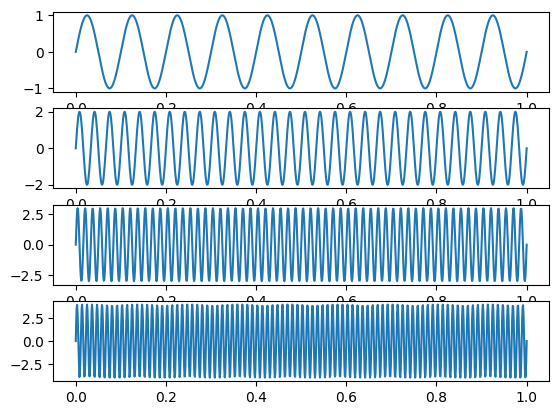

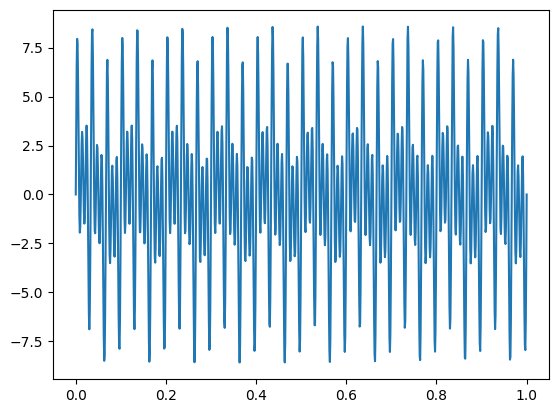

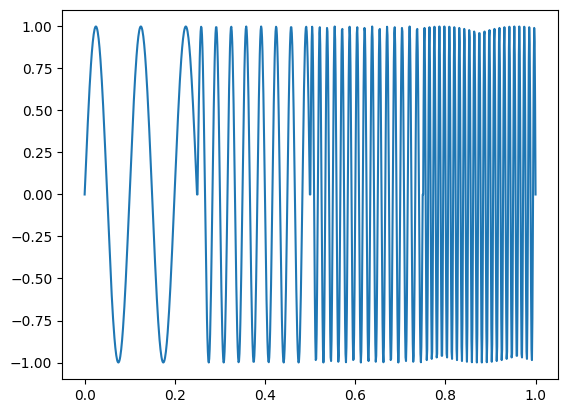

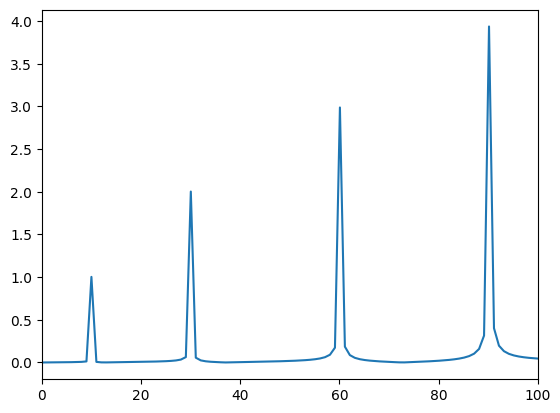

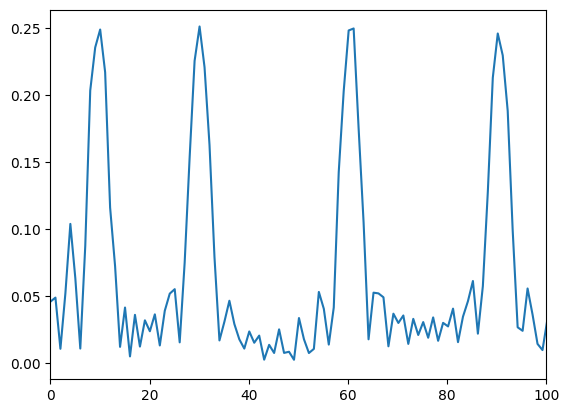

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

t_n = 1
N = 1000 
T = t_n/N    #sampling period
fs = 1 / T
#number of sample points for 1 second
t1 = np.linspace(0, t_n, num=N) #time array
t2 = np.linspace(0, t_n/4, num=int(N/4))
pi = np.pi

frequencies = [10, 30, 60, 90]
sig1_1, sig2_1 = 1 * np.sin(2*pi*frequencies[0]*t1), np.sin(2*pi*frequencies[0]*t2)
sig1_2, sig2_2 = 2 * np.sin(2*pi*frequencies[1]*t1), np.sin(2*pi*frequencies[1]*t2)
sig1_3, sig2_3 = 3 * np.sin(2*pi*frequencies[2]*t1), np.sin(2*pi*frequencies[2]*t2)
sig1_4, sig2_4 = 4 * np.sin(2*pi*frequencies[3]*t1), np.sin(2*pi*frequencies[3]*t2)
#generate signal
signal1 = sig1_1 + sig1_2 + sig1_3 + sig1_4
signal2 = np.concatenate([sig2_1, sig2_2, sig2_3, sig2_4])

fig, axarr = plt.subplots(nrows=4, ncols=1)
axarr[0].plot(t1, sig1_1)
axarr[1].plot(t1, sig1_2)
axarr[2].plot(t1, sig1_3)
axarr[3].plot(t1, sig1_4)
(...)
plt.show()
plt.plot(t1, signal1)
plt.show()
plt.plot(t1, signal2)
plt.show()

signal1_fft = fft(signal1)    #getting fft
f2_1 = np.abs(signal1_fft / N) #full spectrum
f1_1= f2_1[:N//2]              #half spectrum
f1_1[1:] = 2*f1_1[1:]           #actual amplitude

signal2_fft = fft(signal2)    #getting fft
f2_2 = np.abs(signal2_fft / N) #full spectrum
f1_2 = f2_2[:N//2]              #half spectrum
f1_2[1:] = 2*f1_2[1:]           #actual amplitude

freq = fs * np.linspace(0,N/2,int(N/2)) / N     #frequency array
#plot fft result
plt.plot(freq, f1_1)
plt.xlim(0,100)
plt.show()
plt.plot(freq, f1_2)
plt.xlim(0,100)
plt.show()

## Wavelet Transform

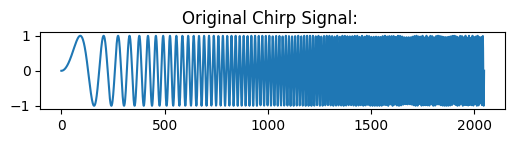

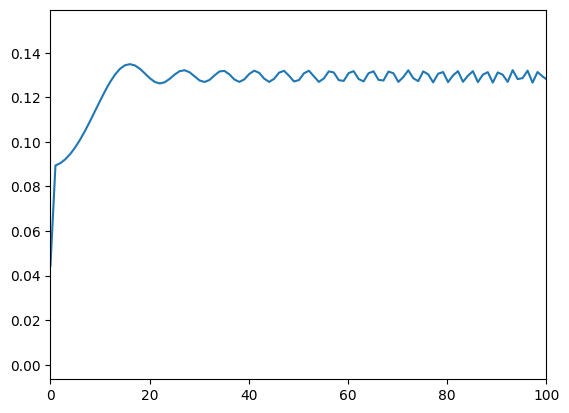

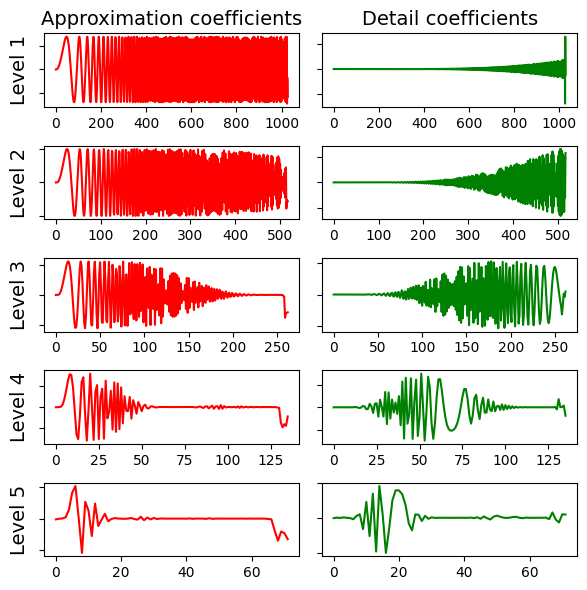

In [60]:
import pywt

x = np.linspace(0, 1, num=2048)
chirp_signal = np.sin(250 * np.pi * x**2)
    
fig, ax = plt.subplots(figsize=(6,1))
ax.set_title("Original Chirp Signal: ")
ax.plot(chirp_signal)
plt.show()
    
data = chirp_signal
waveletname = 'sym5'

chirp_fft = fft(data)    #getting fft
f2_chirp = np.abs(chirp_fft / N) #full spectrum
f1_chirp = f2_chirp[:N//2]              #half spectrum
f1_chirp[1:] = 2*f1_chirp[1:]           #actual amplitude

freq = fs * np.linspace(0,N/2,int(N/2)) / N   
plt.plot(freq, f1_chirp)
plt.xlim(0,100)
plt.show()

fig, axarr = plt.subplots(nrows=5, ncols=2, figsize=(6,6))
for ii in range(5):
    (data, coeff_d) = pywt.dwt(data, waveletname)
    axarr[ii, 0].plot(data, 'r')
    axarr[ii, 1].plot(coeff_d, 'g')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
plt.tight_layout()
plt.show()